In [2]:
import random
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [57]:
main_path = 'D:\\Work\\Helms-Lab\\DNA-Methylation-patterns\\'
data_path = main_path + 'Data\\'
outpath_processing = main_path + 'Data\\Intersect Data\\'

outfile_pandas_NOMe = outpath_processing + 'pandas_promoter_NOMe.csv'
outfile_pandas_WGBS = outpath_processing + 'pandas_promoter_WGBS.csv'

In [58]:
df_inter_promo_WGBS = pd.read_csv(outfile_pandas_WGBS, index_col = 0)

In [59]:
df_inter_promo_WGBS.shape

(25353, 15)

In [60]:
all_trans_ids = set(list(df_inter_promo_WGBS['trans_id']))
all_meth_pos_promo_rel = list(df_inter_promo_WGBS['meth_pos_promo_rel'])
all_meth_rate = list(df_inter_promo_WGBS['meth_rate'])

av_dict = dict()
seen_pos = set()
for p in range(len(all_meth_pos_promo_rel)):
    rel_pos_x = all_meth_pos_promo_rel[p]
    meth_rate = all_meth_rate[p]
    
    #AVERAGE
    if rel_pos_x not in seen_pos:
        seen_pos.add(rel_pos_x)
        av_dict[rel_pos_x] = []

    av_dict[rel_pos_x].append(meth_rate)

In [61]:
x = []
y = []
for rel_pos_x in sorted(av_dict.keys()):
    if rel_pos_x >= -2000 and rel_pos_x <= 1000:
        avg = np.mean(av_dict[rel_pos_x])
        # if avg !=0 and avg !=100:
        x.append(rel_pos_x)
        y.append(avg)
    else:
        print('random pos')

In [62]:
# for i in range(-2000,1001):
#     if i not in x:
#         print(i)

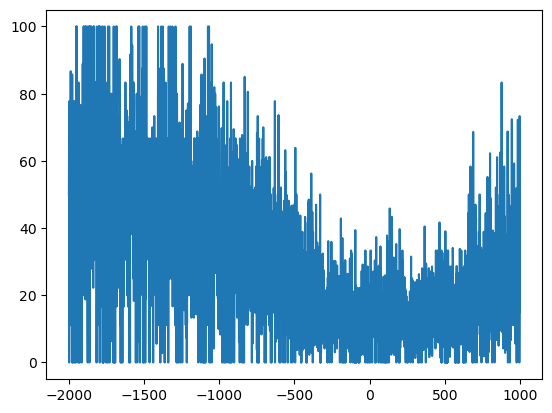

In [63]:
plt.plot(x,y)

In [43]:
y_bin = pd.Series(y).rolling(5).mean()
'''
binning problem - there are missing position values?? Interpolate?
'''

'\nbinning problem - there are missing position values?? Interpolate?\n'

In [64]:
extreme_pos_0 = []
extreme_pos_100 = []
for pos, avg in zip(x,y):
    if avg == 0:
        extreme_pos_0.append(pos)
    if avg == 100:
        extreme_pos_100.append(pos)

In [65]:
dist_extreme_0 = []
for key in extreme_pos_0:
    dist_extreme_0.append(len(av_dict[key]))

(array([23., 32., 19., 21., 13., 14.,  8., 16.,  7., 11., 10.,  7.,  1.,
         3.,  4.,  2.,  1.,  0.,  2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 19 artists>)

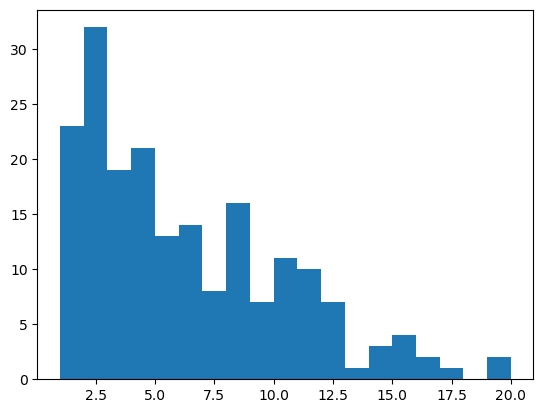

In [66]:
plt.hist(dist_extreme_0, bins=19)

In [67]:
dist_extreme_100 = []
for key in extreme_pos_100:
    dist_extreme_100.append(len(av_dict[key]))

(array([22.,  8.,  9.,  3.,  3.]),
 array([1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 5 artists>)

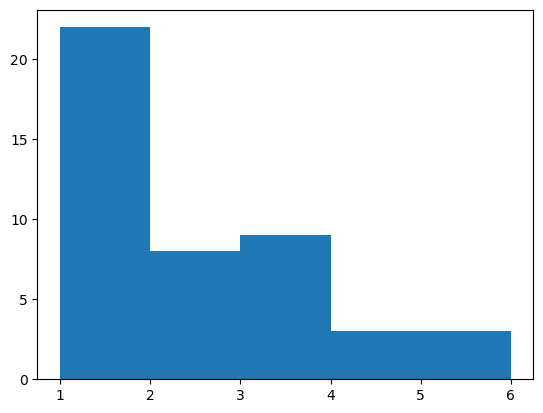

In [69]:
plt.hist(dist_extreme_100, bins=5)

In [79]:
extreme_pos = []
for pos, avg in zip(x,y):
    if avg>40 and avg <50:
        extreme_pos.append(pos)

In [80]:
dist_extreme = []
for key in extreme_pos:
    dist_extreme.append(len(av_dict[key]))

(array([16., 25., 71., 34., 29., 29.,  9.,  8.,  5.,  4.]),
 array([ 2. ,  3.4,  4.8,  6.2,  7.6,  9. , 10.4, 11.8, 13.2, 14.6, 16. ]),
 <BarContainer object of 10 artists>)

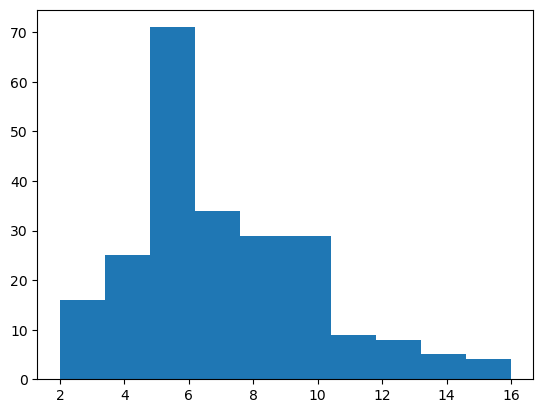

In [81]:
plt.hist(dist_extreme)

In [49]:
df_inter_promo_NOMe = pd.read_csv(outfile_pandas_NOMe, index_col = 0)

In [50]:
df_inter_promo_NOMe.shape

(68280, 15)

In [51]:
all_trans_ids = set(list(df_inter_promo_NOMe['trans_id']))
all_meth_pos_promo_rel = list(df_inter_promo_NOMe['meth_pos_promo_rel'])
all_meth_rate = list(df_inter_promo_NOMe['meth_rate'])

av_dict = dict()
seen_pos = set()
for p in range(len(all_meth_pos_promo_rel)):
    rel_pos_x = all_meth_pos_promo_rel[p]
    meth_rate = all_meth_rate[p]
    
    #AVERAGE
    if rel_pos_x not in seen_pos:
        seen_pos.add(rel_pos_x)
        av_dict[rel_pos_x] = []

    av_dict[rel_pos_x].append(100-meth_rate)

In [52]:
x = []
y = []
for rel_pos_x in sorted(av_dict.keys()):
    if rel_pos_x >= -2000 and rel_pos_x <= 1000:
        avg = np.mean(av_dict[rel_pos_x])
        # if avg !=0 and avg !=100:
        x.append(rel_pos_x)
        y.append(avg)
    else:
        print("random pos")

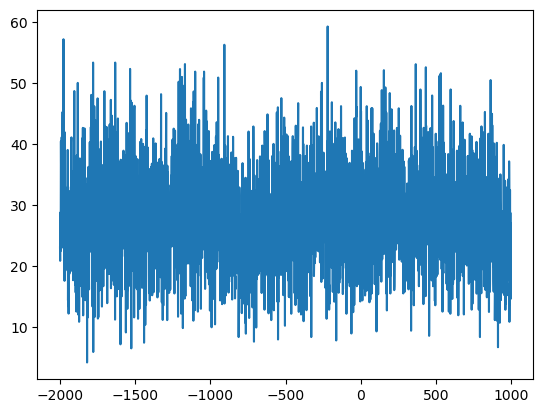

In [53]:
plt.plot(x,y)

3000